# Akkermansia abundance

In [2]:
import plotnine as pn
import pandas as pd
from scipy.stats import sem
%matplotlib inline

In [7]:
dat

,plate #,biological group,sample name,replicate,unique sample name,DNA input (ng),normalization factor,Cq,Log10 qPCR DNA quantity,qPCR DNA quantity (ng),normalized qPCR DNA quantity (ng),Akkermancia Gene Copies,Akkermancia Gene Copies Corrected,Akkermancia Muciniphillia Cells,Akkermancia Muciniphillia Corrected Cell Count,qPCR Outlier,gene_copies
0,Plate1,NTC,1.0,A,NTC_1_A,0.00,0.0,NaN,0.00,0.000000,0.000000,-,-,-,-,No,NaN
1,Plate1,NTC,1.0,B,NTC_1_B,0.00,0.0,NaN,0.00,0.000000,0.000000,-,-,-,-,No,NaN
2,Plate1,NTC,1.0,C,NTC_1_C,0.00,0.0,NaN,0.00,0.000000,0.000000,-,-,-,-,No,NaN
3,Plate2,NTC,2.0,A,NTC_2_A,0.00,0.0,NaN,0.00,0.000000,0.000000,-,-,-,-,No,NaN
4,Plate2,NTC,2.0,B,NTC_2_B,0.00,0.0,NaN,0.00,0.000000,0.000000,-,-,-,-,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,Plate5,Zymo_Mock,5.0,B,Zymo_Mock_5_B,5.00,0.5,33.78,-5.85,0.000001,0.000003,"1,812.24","7,941.73",604.08,"2,647.24",No,NaN
422,Plate5,Zymo_Mock,5.0,C,Zymo_Mock_5_C,5.00,0.5,31.46,-5.21,0.000006,0.000012,"7,937.78","34,785.45","2,645.93","11,595.15",No,NaN
423,Plate6,Zymo_Mock,6.0,A,Zymo_Mock_6_A,5.00,0.5,31.05,-5.10,0.000008,0.000016,"10,282.32","45,059.81","3,427.44","15,019.94",No,NaN
424,Plate6,Zymo_Mock,6.0,B,Zymo_Mock_6_B,5.00,0.5,34.07,-5.93,0.000001,0.000002,"1,508.53","6,610.80",502.84,"2,203.60",No,NaN


In [76]:
dat = pd.read_csv("../akker_qpcr.txt",sep='\t')
dat = pd.read_csv("../Akkermansia_qpcr_fixed.txt",sep='\t')
md = pd.read_csv("../data/metadata/10781_20190528-121437.txt", sep='\t', index_col=0)

#Make numeric
#dat["gene_copies"] = pd.to_numeric(dat["Akkermancia Gene Copies Corrected"], errors='coerce')
#drop NA values
#dat = dat.loc[dat["gene_copies"].notna()]

In [77]:
dat = pd.read_csv("../akker_qpcr.txt",sep='\t')
dat = pd.read_csv("../Akkermansia_qpcr_fixed.txt",sep='\t')
md = pd.read_csv("../data/metadata/10781_20190528-121437.txt", sep='\t', index_col=0)

#Make unique sample id
dat["unique sample name"] = ['_'.join(str(x).split('_')[:-1]) for x in dat["unique sample name"]]
#Make numeric
dat["gene_copies"] = pd.to_numeric(dat["Akkermancia Gene Copies Corrected"], errors='coerce')
#drop NA values
dat = dat.loc[dat["gene_copies"].notna()]


#Group technical replicates
dat = dat.groupby("unique sample name").agg({"biological group":"first", "gene_copies":"mean"})

#Get mean and sem
mean_df = dat.groupby('biological group').agg({"gene_copies":["mean","sem"]}).reset_index()

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
from statannot import add_stat_annotation

In [79]:
from math import log

In [80]:
dat_log = dat.copy()
dat_log["gene_copies"] = [log(x+.001) for x in dat.gene_copies]

### Data is not normally distributed

In [82]:
from scipy.stats import shapiro
stat, p = shapiro(dat.query('`biological group`=="Qa-1-/-"').gene_copies)
print("stat:",stat,"p:",p)

stat: 0.19989174604415894 p: 6.470267631882866e-17


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Qa-1-/- v.s. WT: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.626e-11 U_stat=6.030e+02


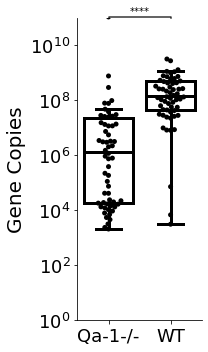

In [84]:
fig = plt.figure(figsize=(3,5))

ax = fig.add_subplot(111)
ax.set( yscale="log")

oo = ["Qa-1-/-","WT"]
plot_dat = dat.query('gene_copies !=0')
sns.boxplot(data=plot_dat, x="biological group", y="gene_copies", color="white", linewidth=3, fliersize=0, ax=ax, order=oo)
sns.swarmplot( data=plot_dat, x="biological group", y="gene_copies", color="black", ax=ax, order=oo)

ax.set_ylim([1,100000000000])
for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    box.set_facecolor('white')
    
    for j in range(6*i,6*(i+1)):
         ax.lines[j].set_color('black')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
 
add_stat_annotation(ax, data=dat, x="biological group", y="gene_copies",
                    box_pairs=[("Qa-1-/-", "WT")],
                    test='Mann-Whitney', text_format='star', loc='outside', order=oo)
    
ax.set_xlabel('')
ax.set_ylabel('Gene Copies', fontsize=20)
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)

plt.tight_layout()
fig.savefig("Akkermansia_boxplot.pdf", dpi=300)